# Tutorial: distortion function

The distortion can be assigned to the optics of the telescope. The distortion function should receive an array with a shape of $(2, N)$. The first and second elements are the x- and y-positions on the focal plane, respectively. An array with the same shape is returned, which contains the coordinates with distortion.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from warpfield.telescope import display_sources, get_subplot
from warpfield.telescope.jasmine import get_jasmine

In [11]:
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u

An artificial source set is used in this notebook. Define a grid in a &pm;0.3&deg; region around the origin of the ICRS frame.

In [12]:
arr = np.linspace(-0.3, 0.3, 30)
xx,yy = np.meshgrid(arr,arr)
ra  = [x*u.degree for x in xx.flat]
dec = [y*u.degree for y in yy.flat] 
src = SkyCoord(ra, dec, frame='icrs')

The telescope is pointed toward the origin of the ICRS frame. The position angle is 0.0&deg;.

In [13]:
pointing = SkyCoord(0.0*u.deg,0.0*u.deg, frame='icrs')
position_angle = Angle(0.0, unit='degree')
jasmine = get_jasmine(pointing, position_angle)

The figure below shows the on-sky distribution of the artifical sources. A well-organized grid pattern is recognized.

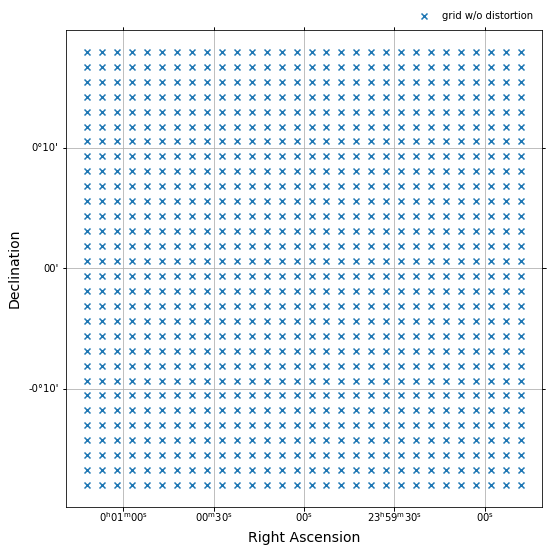

In [14]:
fig,ax = get_subplot(pointing, figsize=(8,8))
display_sources(ax, src, title='grid w/o distortion')
fig.tight_layout()
plt.show()

The `identity_transformation` is assigned to the optics if not specified.

In [15]:
jasmine.optics.distortion

<function warpfield.telescope.distortion.identity.identity_transformation(position)>

This function does not change the given position at all. Thus, the source distribution on the plane is the same as on the sky.

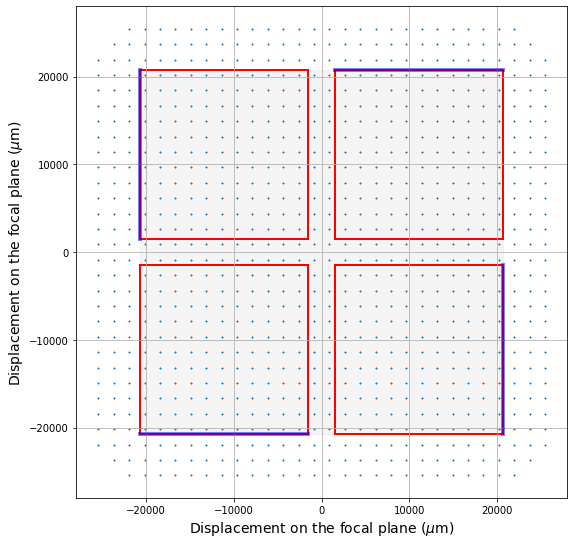

In [16]:
fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()

The module provide the class `LegendreDistortion` to generate a distortion function defined by an expansion of the Legendre polynomials. The distortion function is defined as follows:

$$
f(x,y) = \sum_{0 \le i{+}j \le N} A_{i,j} \mathcal{L}_i(x)\mathcal{L}_j(y), \quad
g(x,y) = \sum_{0 \le i{+}j \le N} B_{i,j} \mathcal{L}_i(x)\mathcal{L}_j(y),
$$

where $N$ is the maximum order of the distortion, and $f(x,y)$ and $g(x,y)$ are the displacements of the x- and y-coordinates, respectively. The arguments of `LegendreDistortion` are the order $N$ and two $(N+1, N+1)$ arrays.

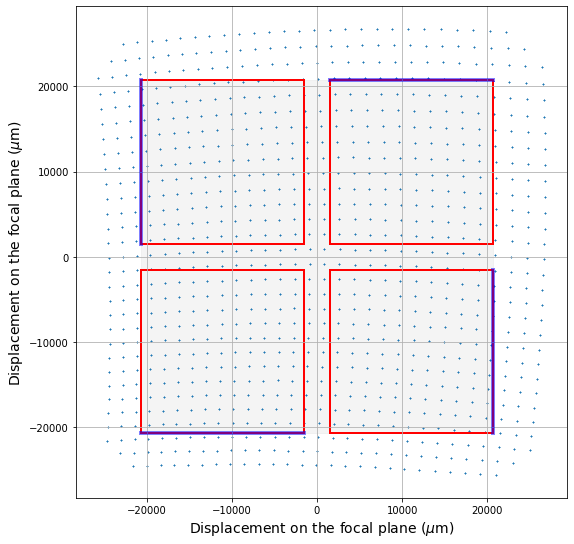

In [17]:
from warpfield.telescope.distortion.legendre import LegendreDistortion
sip_a = np.zeros((6,6))
sip_b = np.zeros((6,6))
sip_a[2,0] = -1e3
sip_a[1,1] = -1e3
sip_a[0,2] =  1e3
sip_b[2,0] =  1e3
sip_b[1,1] = -1e3
sip_b[0,2] = -1e3
distortion = LegendreDistortion(5, sip_a, sip_b)
jasmine.optics.set_distortion(distortion)

fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()

The distortion center of `LegendreDistortion` are alined to the center of the focal plane. The distortion center can be displaced by using the class `DisplacedLegendreDistortion` instead of `LegendreDistortion`.

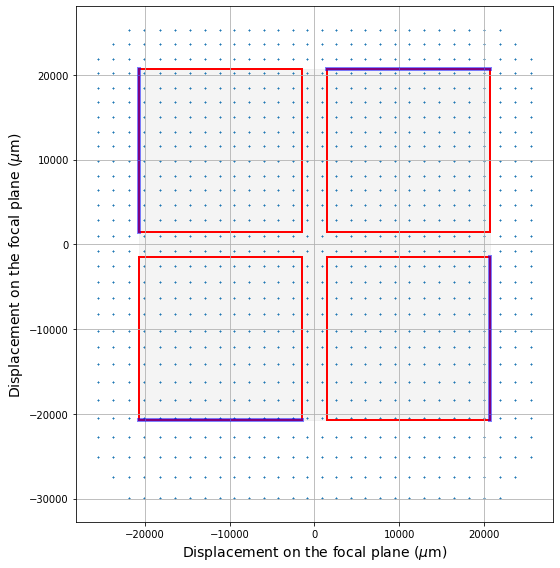

In [18]:
from warpfield.telescope.distortion.legendre import DisplacedLegendreDistortion
sip_a = np.zeros((6, 6))
sip_b = np.zeros((6, 6))
sip_c = np.array([0, 20000])
sip_a[3,0] = -5e2
sip_b[0,3] = -5e2
distortion = DisplacedLegendreDistortion(5, sip_c, sip_a, sip_b)
jasmine.optics.set_distortion(distortion)

fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()